In [1]:
############## first to create table of tic tac to ##############

import random
import numpy as np
def create_board():
    board = np.zeros((3,3), dtype=int)
    return board

board = create_board() 
print(board)


[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [2]:
################## second to provide control to user ##################

def place(board, player, position):
    if board[position] == 0:
        board[position] = player
        return board

board = create_board()
place(board, 1, (2, 1))

array([[0, 0, 0],
       [0, 0, 0],
       [0, 1, 0]])

In [3]:
################### programm to use np.where ##################
import numpy as np
def possibilities(board):
    return np.where(board==0)
possibilities(board)



(array([0, 0, 0, 1, 1, 1, 2, 2]), array([0, 1, 2, 0, 1, 2, 0, 2]))

In [4]:
################### random_place creation #####################
def random_place(board, player):
    selections = possibilities(board)
    
    if len(selections) > 0:
        selection = random.choice([(0,0),(0,1),(0,2),(1,0),(1,1)])
        place(board, player, selection)
    return board

random_place(board, 2)

array([[0, 0, 0],
       [0, 2, 0],
       [0, 1, 0]])

In [5]:
board = create_board()
for i in range(0,3):
    board=random_place(board,1)
    board=random_place(board,2)
print(board)


[[0 1 1]
 [0 1 0]
 [0 0 0]]


In [6]:
def row_win(board, player):
    if np.any(np.all(board==player,axis=1)): 
        return True
    else:
        return False

row_win(board, 1)

False

In [7]:
def col_win(board, player):
    if np.any(np.all(board==player,axis=0)): 
        return True
    else:
        return False

col_win(board, 1)

False

In [8]:
def diag_win(board, player):
    digcheck=np.diag(board)
    if np.all(digcheck==player): 
        return True
    else:
        return False

diag_win(board, 1)

False

In [9]:
########################## code for checking winner ##########################
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        if row_win(board, player) or col_win(board, player) or diag_win(board, player):
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

evaluate(board)


0

In [10]:
############################ ply tic-tack-toe ##############################
def play_game():
    board=create_board()
    for player in [1,2]:
        if evaluate(random_place(board, player)):
            return player
        else:
            return -1
play_game()

-1

0.20698308944702148


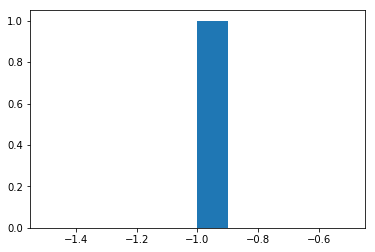

In [12]:
############################ calculating time during time #################
import time
import matplotlib.pyplot as plt
start=time.time()
for i in range(1000):
    winner=play_game()
stop = time.time()
print(stop-start)
plt.hist(winner);
#plt.show()

In [ ]:
def play_strategic_game():
    board, winner = create_board(), 0
    board[1,1] = 1
    while winner == 0:
        for player in [2,1]:
            
            winner=evaluate(random_place(board, player))
            if winner != 0:
                break
    return winner

play_strategic_game()

In [ ]:
######################### calculating time for playing strategic_game #####################
import time
start = time.time()
for i in range(1000):
    winner=play_strategic_game()
end = time.time()
print(end-start)
plt.hist(winner)
plt.show()